In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
from velocity_stats import VelocityData

%matplotlib inline

In [2]:
fine = VelocityData('./postProcessing/center_probe/290.5/U')
coarse = VelocityData('./postProcessing_60/center_probe/50/U')

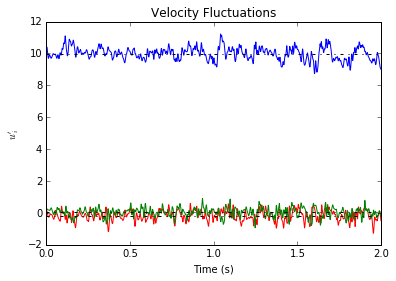

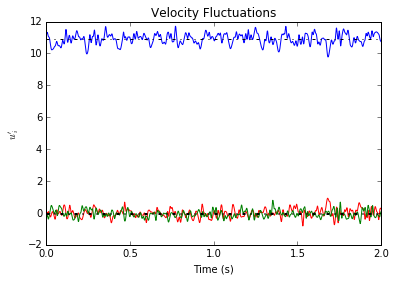

In [3]:
fine.velocity_fluctuation_plot(N=8000)
coarse.velocity_fluctuation_plot(N=8000)
plt.show()

### Calculating velocity autocorrelation using Fourier transform ###
$\displaystyle u' = \tilde{u} - U$

$\displaystyle R_{xx}(m) = \lim_{T\to\infty} \left( \frac{1}{T} \right) \int_0^T f(t) \, f^*(t) \, dt$

$\displaystyle \hat{R}_{xx}(m) = \mathcal{F}_x \left[ f_{\nu,i} \; f^*_{\nu,i} \right]$

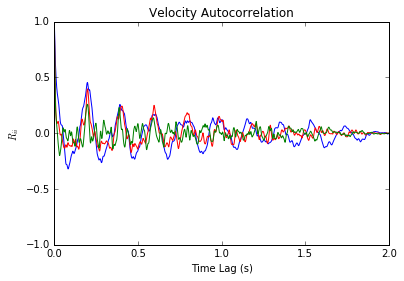

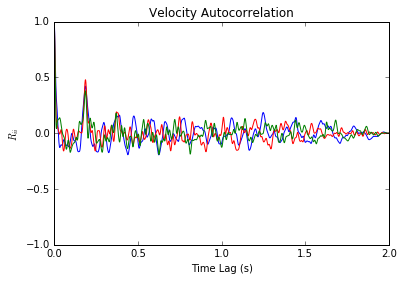

In [4]:
fine.autocorr_fourier_plot(N=8000, step=1)
coarse.autocorr_fourier_plot(N=8000, step=1)

### Calculating velocity autocorrelation using discrete values ###

$\displaystyle \hat{R}_{ff}(m) = \left( \frac{1}{N} \right) \sum_{i=0}^{N-m-1} f_i \, f^*_{i+m}$

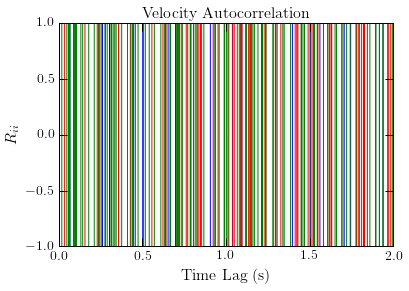

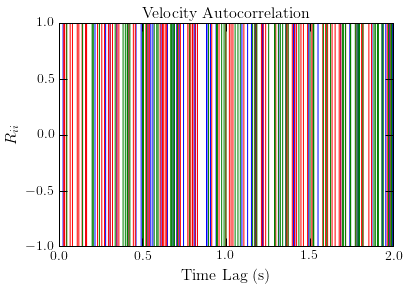

In [5]:
fine.autocorr_sum_plot(lag=8000, step=1)
coarse.autocorr_sum_plot(lag=8000, step=1)

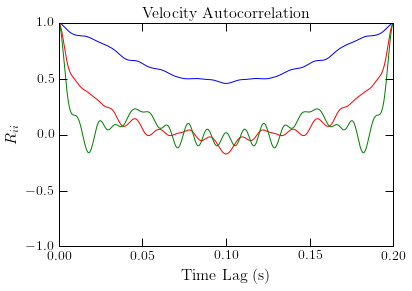

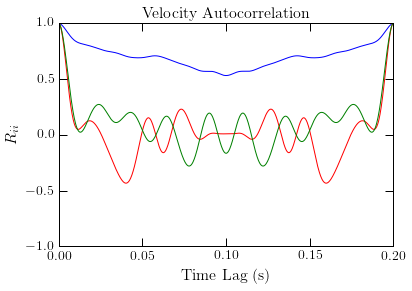

In [30]:
# Try rolling list
def new_sum_autocorr(arr):
    #df = pd.DataFrame()
    orig = pd.Series(arr)
    lags = []
    sums = []
    for i in range(1, len(arr)):
        # Offset array by i
        #offset = [df[0][j % df[0].count()] for j in range(i, df[0].count()+i)]
        #offset = pd.Series(offset)
        offset = pd.Series(np.roll(arr, i))
        #df["d{}".format(i)] = df.apply(lambda x: x[0] - offset)
        lags.append(i)
        sums.append((orig * offset).sum() / offset.count())
    #diffs = pd.DataFrame()
    #for i in range(1, df[0].count()):
    #    diffs["d{}".format(i)] = df.apply(lambda x: x[0] - x[i])
    #return diffs
    return pd.DataFrame({'lag':lags, 'sum':sums})

pts = 800
fine.reset_data()
fine_Rxx = new_sum_autocorr(fine.up[-pts:])
#fRxx_var = (fine.up**2).sum() / fine.up.size
fRxx_var = fine_Rxx['sum'][0]
fine_Ryy = new_sum_autocorr(fine.vp[-pts:])
#fRyy_var = (fine.vp**2).sum() / fine.vp.size
fRyy_var = fine_Ryy['sum'][0]
fine_Rzz = new_sum_autocorr(fine.wp[-pts:])
#fRzz_var = (fine.wp**2).sum() / fine.wp.size
fRzz_var = fine_Rzz['sum'][0]

coarse.reset_data()
coarse_Rxx = new_sum_autocorr(coarse.up[-pts:])
#cRxx_var = (coarse.up**2).sum() / coarse.up.size
cRxx_var = coarse_Rxx['sum'][0]
coarse_Ryy = new_sum_autocorr(coarse.vp[-pts:])
#cRyy_var = (coarse.vp**2).sum() / coarse.vp.size
cRyy_var = coarse_Ryy['sum'][0]
coarse_Rzz = new_sum_autocorr(coarse.wp[-pts:])
#cRzz_var = (coarse.wp**2).sum() / coarse.wp.size
cRzz_var = coarse_Rzz['sum'][0]

dt = 0.00025
fig, ax = plt.subplots(1)
ax.plot(fine_Rxx['lag']*dt, fine_Rxx['sum']/fRxx_var, color='b')
ax.plot(fine_Ryy['lag']*dt, fine_Ryy['sum']/fRyy_var, color='r')
ax.plot(fine_Rzz['lag']*dt, fine_Rzz['sum']/fRzz_var, color='g')
ax.set_title("Velocity Autocorrelation")
ax.set_xlabel("Time Lag (s)")
ax.set_ylabel("$R_{ii}$")
ax.set_ylim(-1,1)
plt.show()

fig, ax = plt.subplots(1)
ax.plot(coarse_Rxx['lag']*dt, coarse_Rxx['sum']/cRxx_var, color='b')
ax.plot(coarse_Ryy['lag']*dt, coarse_Ryy['sum']/cRyy_var, color='r')
ax.plot(coarse_Rzz['lag']*dt, coarse_Rzz['sum']/cRzz_var, color='g')
ax.set_title("Velocity Autocorrelation")
ax.set_xlabel("Time Lag (s)")
ax.set_ylabel("$R_{ii}$")
ax.set_ylim(-1,1)
plt.show()

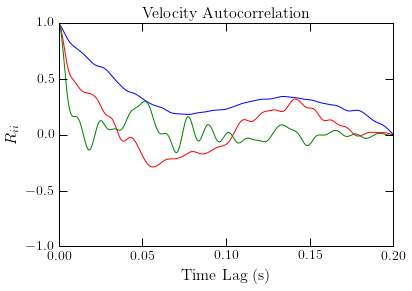

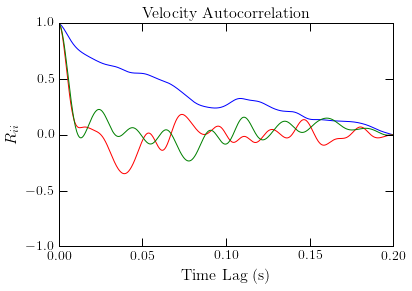

In [26]:
# Try filling in zeros instead of rolling
def new_sum_ac(arr):
    #df = pd.DataFrame()
    orig = pd.Series(arr)
    lags = []
    sums = []
    for i in range(len(arr)):
        # Offset array by i
        #offset = [df[0][j % df[0].count()] for j in range(i, df[0].count()+i)]
        #offset = pd.Series(offset)
        offset = pd.Series(orig.shift(-i).fillna(0))
        #df["d{}".format(i)] = df.apply(lambda x: x[0] - offset)
        lags.append(i)
        sums.append((orig * offset).sum() / offset.count())
    #diffs = pd.DataFrame()
    #for i in range(1, df[0].count()):
    #    diffs["d{}".format(i)] = df.apply(lambda x: x[0] - x[i])
    #return diffs
    return pd.DataFrame({'lag':lags, 'sum':sums})

pts = 800
fine.reset_data()
fine_Rxx = new_sum_ac(fine.up[-pts:])
#fRxx_var = (fine.up**2).sum() / fine.up.size
fRxx_var = fine_Rxx['sum'][0]
fine_Ryy = new_sum_ac(fine.vp[-pts:])
#fRyy_var = (fine.vp**2).sum() / fine.vp.size
fRyy_var = fine_Ryy['sum'][0]
fine_Rzz = new_sum_ac(fine.wp[-pts:])
#fRzz_var = (fine.wp**2).sum() / fine.wp.size
fRzz_var = fine_Rzz['sum'][0]

coarse.reset_data()
coarse_Rxx = new_sum_ac(coarse.up[-pts:])
#cRxx_var = (coarse.up**2).sum() / coarse.up.size
cRxx_var = coarse_Rxx['sum'][0]
coarse_Ryy = new_sum_ac(coarse.vp[-pts:])
#cRyy_var = (coarse.vp**2).sum() / coarse.vp.size
cRyy_var = coarse_Ryy['sum'][0]
coarse_Rzz = new_sum_ac(coarse.wp[-pts:])
#cRzz_var = (coarse.wp**2).sum() / coarse.wp.size
cRzz_var = coarse_Rzz['sum'][0]

dt = 0.00025
fig, ax = plt.subplots(1)
ax.plot(fine_Rxx['lag']*dt, fine_Rxx['sum']/fRxx_var, color='b')
ax.plot(fine_Ryy['lag']*dt, fine_Ryy['sum']/fRyy_var, color='r')
ax.plot(fine_Rzz['lag']*dt, fine_Rzz['sum']/fRzz_var, color='g')
ax.set_title("Velocity Autocorrelation")
ax.set_xlabel("Time Lag (s)")
ax.set_ylabel("$R_{ii}$")
ax.set_ylim(-1,1)
plt.show()

fig, ax = plt.subplots(1)
ax.plot(coarse_Rxx['lag']*dt, coarse_Rxx['sum']/cRxx_var, color='b')
ax.plot(coarse_Ryy['lag']*dt, coarse_Ryy['sum']/cRyy_var, color='r')
ax.plot(coarse_Rzz['lag']*dt, coarse_Rzz['sum']/cRzz_var, color='g')
ax.set_title("Velocity Autocorrelation")
ax.set_xlabel("Time Lag (s)")
ax.set_ylabel("$R_{ii}$")
ax.set_ylim(-1,1)
plt.show()

In [23]:
coarse_Rxx['sum'][0]/cRxx_var

1.0